In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush

In [2]:
def search_algo(graph, start_node, algo='Priority Queue', goal='9'):
    visited = set()
    # queue = [start.node]
    
    # use queue, stack or heap based on chosen algorithm
    if algo == 'BFS':
        q = deque()
        popfunction = q.popleft # FIFO queue
        addfunction = q.append 
    elif algo == 'DFS':
        q = deque()
        popfunction = q.pop # LIFO stack
        addfunction = q.append
    elif algo == 'Priority Queue':
        q = [] # heapq does not work with deque() ---> has to be a list
        popfunction = lambda: heappop(q)[1]  # Extract node with lowest cost
        addfunction = lambda node, cost: heappush(q, (cost, node))
        addfunction(start_node, 0)  # Start with cost 0
    else:
        raise ValueError("Unknown algorithm")

    if algo != 'Priority Queue':
        q.append(start_node)
    
    while len(q) > 0:
        node = popfunction()
        visited.add(node)

        print(node)
        
        if node == goal:
            print('The target has been reached!')
            break
        else:
            for _, edge in graph.edges(node):  # `_` is node itself, we take neighbor
                if edge not in visited:
                    weight = graph[node][edge].get("weight", 1)
                    if algo == 'Priority Queue':
                        addfunction(edge, weight)  # Push neighbor with priority cost
                    else:
                        addfunction(edge)

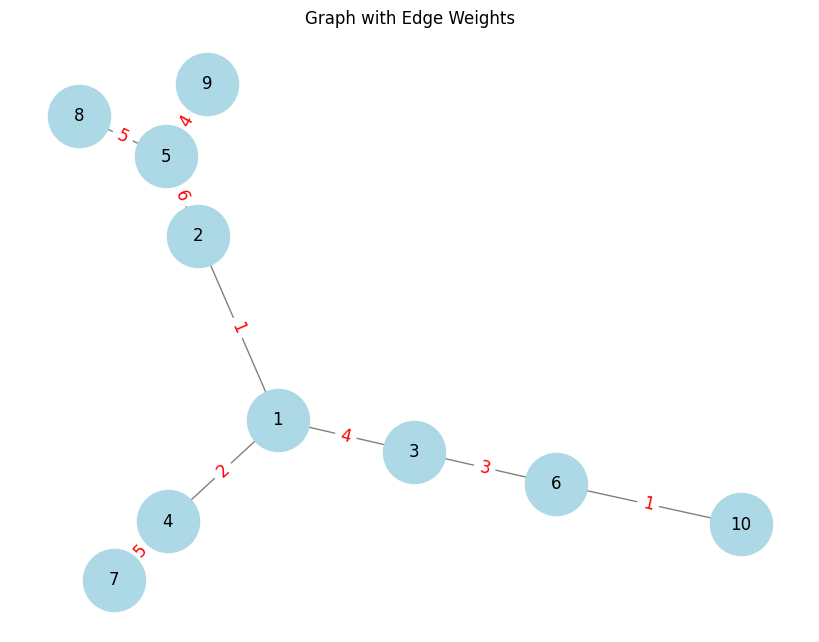

1
2
4
3
6
10
7
5
9
The target has been reached!


In [3]:
# Create a graph
graph = nx.Graph()

# Define edges with weights (in format: (node1, node2, weight))
weighted_edges = [
    ('1', '2', 1), ('1', '3', 4), ('1', '4', 2),
    ('2', '5', 6),
    ('3', '6', 3),
    ('4', '7', 5),
    ('5', '8', 5), ('5', '9', 4),
    ('6', '10', 1)
]

# Add edges with weights
graph.add_weighted_edges_from(weighted_edges)

# Define positions for nodes
pos = nx.spring_layout(graph)  # Generates a layout for visualization

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(graph, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)

# Extract edge weights and display them
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12, font_color="red")

plt.title("Graph with Edge Weights")
plt.show()
# nx.draw(graph, with_labels=True)

search_algo(graph, '1')